#**Fase 1 | Avance de Proyecto**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Operaciones de Aprendizaje Automático**
####**Tecnológico de Monterrey**
#####**Prof L José Ángel Martínez Navarro**

###**Equipo 24:**

###
A01796937 - Sandra Luz Cervantes Espinoza

A01226881 - Héctor Jesús López Meza

A01796697 - Mauricio Torres Baena

A01795838 - Javier Augusto Rebull Saucedo

A01360416 – David Cruz Beltrán

**Información:**

*   Dataset Turkish Music Emotion archivo "Acoustic Features.csv".


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [5]:
# Cargamos desde PC
#$from google.colab import files
#uploaded = files.upload()

#df = pd.read_csv("Acoustic Features.csv")
#df.head()

In [6]:
import pandas as pd
df = pd.read_csv("Acoustic Features.csv")
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


#**Proceso**

**Análisis exploratorio (EDA):**

*   Análisis descriptivo
* Análisis de variables numéricas
* Análisis de variables de texto
* Análisis de correlación (bivariante y multivariante)

**Preprocesamiento**
* Valores faltantes
* Valores atípicos

**Ingeniería de características**
**Entrenando y evaluando el modelo**


#**1. Análisis exploratorio (EDA)**

Estadísticas descriptivas

In [10]:
estadisticas_descriptivas = df.describe()
estadisticas_descriptivas

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


Valores únicos por variable para identificar posibles variables categóricas

In [12]:
data_df_unique = df.nunique()
data_df_unique

Class                                               4
_RMSenergy_Mean                                   196
_Lowenergy_Mean                                   166
_Fluctuation_Mean                                 377
_Tempo_Mean                                       388
_MFCC_Mean_1                                      354
_MFCC_Mean_2                                      347
_MFCC_Mean_3                                      319
_MFCC_Mean_4                                      316
_MFCC_Mean_5                                      297
_MFCC_Mean_6                                      297
_MFCC_Mean_7                                      304
_MFCC_Mean_8                                      273
_MFCC_Mean_9                                      278
_MFCC_Mean_10                                     271
_MFCC_Mean_11                                     253
_MFCC_Mean_12                                     272
_MFCC_Mean_13                                     259
_Roughness_Mean             

Búsqueda de valores faltantes

In [14]:
data_df_missing = df.isnull().sum()
data_df_missing

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

Diagrama de barras para determinar la frecuencia de las emociones

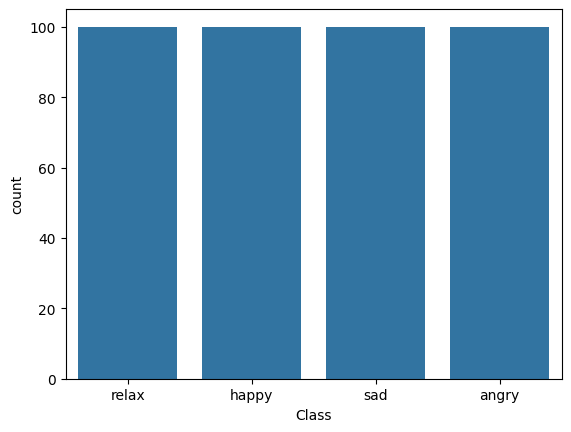

In [16]:
sns.countplot(x='Class', data=df)
plt.show()


Histogramas para cada característica numérica, para ver qué tan equilibrados están los datos

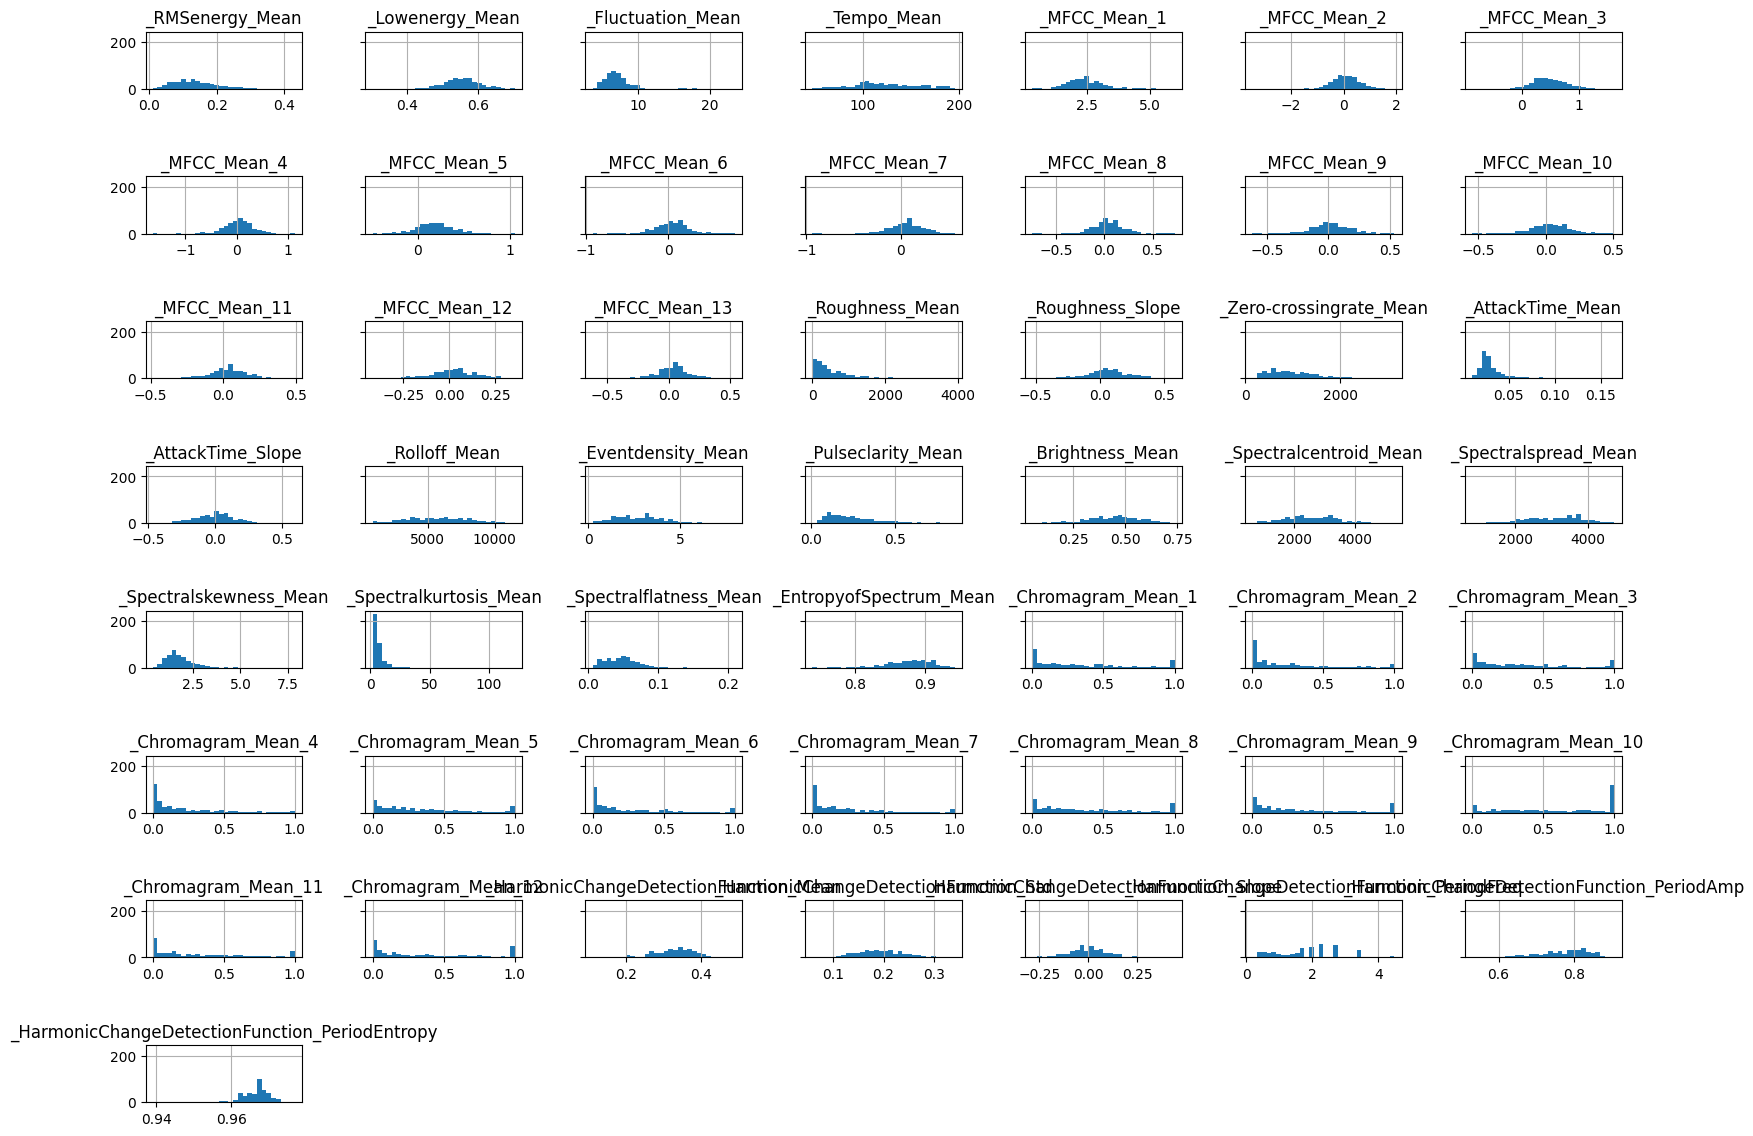

In [18]:
hist = df.hist(bins=30, sharey=True, figsize=(16, 12))
plt.tight_layout(pad=3.0)
plt.show()

In [19]:
#Tablas de frecuencia para cada característica categórica

In [20]:
for column in df.select_dtypes(include=[ 'object', 'bool']).columns:
  display(column, pd.crosstab(index=df[column], columns='% observations', normalize='columns') * 100)

'Class'

col_0,% observations
Class,
angry,25.0
happy,25.0
relax,25.0
sad,25.0


mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe

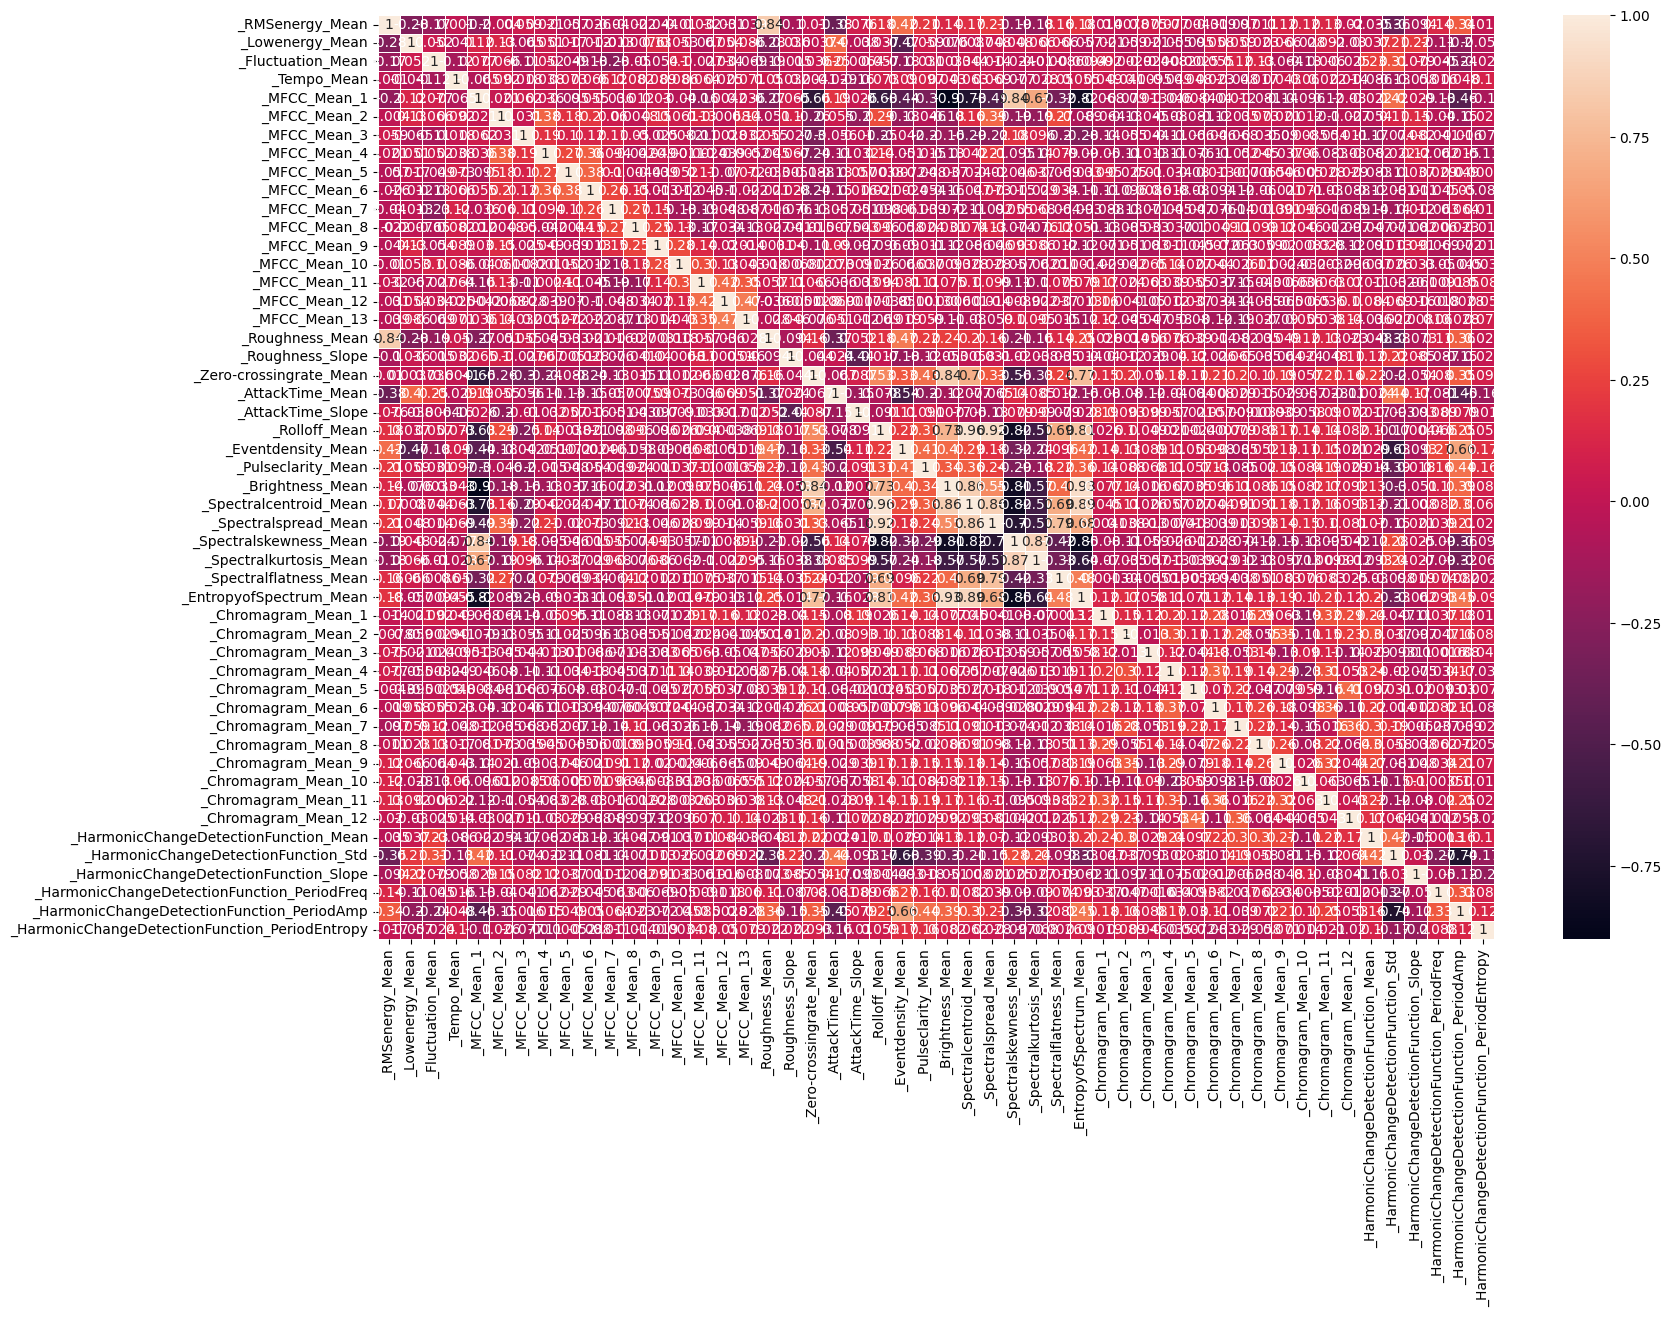

In [22]:
data_df_numeric = df.select_dtypes(include=[np.number])

data_df_corr = data_df_numeric.corr()

plt.figure(figsize=(18,12))
sns.heatmap(data_df_corr, annot=True, linewidths=0.5)
plt.show()